Mestrado em Modelagem Matematica da Informacao
----------------------------------------------
Disciplina: Modelagem e Mineracao de Dados
------------------------------------------

Master Program - Mathematical Modeling of Information
-----------------------------------------------------
Course: Data Mining and Modeling
--------------------------------

Professor: Renato Rocha Souza
-----------------------------  

Introduction to Data Mining  
--------------------------------------------
Comparing Weka and Python for the same tasks  
http://www.reddit.com/r/MachineLearning/comments/1rwj8p/why_are_python_r_so_much_more_popular_here_than/
____________________________________________

In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import scipy.stats as ss
from scipy.io.arff import loadarff
import os

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
datapath = "/home/rsouza/Dropbox/Renato/ModMinDados/Git/datasets/"
outputs = "/home/rsouza/Dropbox/Renato/ModMinDados/outputs/"

In [4]:
dataset1 = "bank.arff"
dataset2 = "zoo.arff"
dataset3 = "weather.nominal.arff"
dataset4 = "vote.arff"

#### Explorando os dados: Bank.arff

In [5]:
bank = loadarff(os.path.join(datapath,dataset1))
df_bank = pd.DataFrame(bank[0])

In [6]:
df_bank.head()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48.0,b'FEMALE',b'INNER_CITY',17546.0,b'NO',b'1',b'NO',b'NO',b'NO',b'NO',b'YES'
1,40.0,b'MALE',b'TOWN',30085.1,b'YES',b'3',b'YES',b'NO',b'YES',b'YES',b'NO'
2,51.0,b'FEMALE',b'INNER_CITY',16575.4,b'YES',b'0',b'YES',b'YES',b'YES',b'NO',b'NO'
3,23.0,b'FEMALE',b'TOWN',20375.4,b'YES',b'3',b'NO',b'NO',b'YES',b'NO',b'NO'
4,57.0,b'FEMALE',b'RURAL',50576.3,b'YES',b'0',b'NO',b'YES',b'NO',b'NO',b'NO'


In [7]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
age            600 non-null float64
sex            600 non-null object
region         600 non-null object
income         600 non-null float64
married        600 non-null object
children       600 non-null object
car            600 non-null object
save_act       600 non-null object
current_act    600 non-null object
mortgage       600 non-null object
pep            600 non-null object
dtypes: float64(2), object(9)
memory usage: 51.6+ KB


In [8]:
df_bank.columns

Index(['age', 'sex', 'region', 'income', 'married', 'children', 'car',
       'save_act', 'current_act', 'mortgage', 'pep'],
      dtype='object')

In [9]:
features = set(df_bank.columns)
features -= set(['age','income']) # retiro os valores numéricos
features

{'car',
 'children',
 'current_act',
 'married',
 'mortgage',
 'pep',
 'region',
 'save_act',
 'sex'}

In [10]:
for feature in features:
    print(u'Feature {} possui os valores únicos: {}'.format(feature, df_bank[feature].unique()))

Feature car possui os valores únicos: [b'NO' b'YES']
Feature mortgage possui os valores únicos: [b'NO' b'YES']
Feature region possui os valores únicos: [b'INNER_CITY' b'TOWN' b'RURAL' b'SUBURBAN']
Feature pep possui os valores únicos: [b'YES' b'NO']
Feature save_act possui os valores únicos: [b'NO' b'YES']
Feature sex possui os valores únicos: [b'FEMALE' b'MALE']
Feature current_act possui os valores únicos: [b'NO' b'YES']
Feature children possui os valores únicos: [b'1' b'3' b'0' b'2']
Feature married possui os valores únicos: [b'NO' b'YES']


#### Discretizando os dados

http://stackoverflow.com/questions/19798153/difference-between-map-applymap-and-apply-methods-in-pandas

In [11]:
df_bank2 = df_bank.copy()

df_bank2.children = df_bank.children.map(int)
df_bank2.age = df_bank.age.map(int)

d1 = {b'YES': True, b'NO': False}
df_bank2['married'] = df_bank['married'].map(d1)
df_bank2['save_act'] = df_bank['save_act'].map(d1)
df_bank2['current_act'] = df_bank['current_act'].map(d1)
df_bank2['mortgage'] = df_bank['mortgage'].map(d1)
df_bank2['pep'] = df_bank['pep'].map(d1)
df_bank2['car'] = df_bank['car'].map(d1)

d2 = {b'FEMALE':1, b'MALE':0}
df_bank2['sex'] = df_bank['sex'].map(d2)

d3 = {b'INNER_CITY':0, b'TOWN':1, b'SUBURBAN':2, b'RURAL':3}
df_bank2['region'] = df_bank['region'].map(d3)

In [12]:
df_bank2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
age            600 non-null int64
sex            600 non-null int64
region         600 non-null int64
income         600 non-null float64
married        600 non-null bool
children       600 non-null int64
car            600 non-null bool
save_act       600 non-null bool
current_act    600 non-null bool
mortgage       600 non-null bool
pep            600 non-null bool
dtypes: bool(6), float64(1), int64(4)
memory usage: 27.0 KB


In [13]:
df_bank2.head()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,1,0,17546.0,False,1,False,False,False,False,True
1,40,0,1,30085.1,True,3,True,False,True,True,False
2,51,1,0,16575.4,True,0,True,True,True,False,False
3,23,1,1,20375.4,True,3,False,False,True,False,False
4,57,1,3,50576.3,True,0,False,True,False,False,False


In [14]:
byPEP = df_bank2.groupby(['pep'])
byPEP.describe()

age    children        income      region         sex
pep                                                                      
False count  326.000000  326.000000    326.000000  326.000000  326.000000
      mean    40.098160    1.067485  24900.953374    0.944785    0.521472
      std     14.123506    1.195524  11661.123422    1.071313    0.500307
      min     18.000000    0.000000   5014.210000    0.000000    0.000000
      25%     27.000000    0.000000  15366.475000    0.000000    0.000000
      50%     40.000000    0.000000  23105.000000    1.000000    1.000000
      75%     51.000000    2.000000  31210.900000    1.000000    1.000000
      max     67.000000    3.000000  61554.600000    3.000000    1.000000
True  count  274.000000  274.000000    274.000000  274.000000  274.000000
      mean    45.127737    0.945255  30644.919453    1.010949    0.474453
      std     14.327991    0.860571  13609.613043    1.117571    0.500261
      min     18.000000    0.000000   7756.360000    0.000000    0.000000
      25%     34.000000    0.000000  19639.475000    0.000000    0.000000
      50%     45.000000    1.000000  28080.050000    1.000000    0.000000
      75%     58.000000    1.000000  38458.350000    2.000000    1.000000
      max     67.000000    3.000000  63130.100000    3.000000    1.000000

In [15]:
df_bank2[(df_bank2.sex == 0) & (df_bank2.pep == True)].describe()

,age,sex,region,income,children
count,144.000000,144.0,144.000000,144.000000,144.000000
mean,43.361111,0.0,0.972222,30384.348681,0.902778
std,14.291477,0.0,1.121590,13126.067225,0.847204
min,18.000000,0.0,0.000000,8062.730000,0.000000
25%,32.750000,0.0,0.000000,20098.475000,0.000000
50%,43.000000,0.0,1.000000,27510.500000,1.000000
75%,56.000000,0.0,2.000000,39145.050000,1.000000
max,67.000000,0.0,3.000000,59409.100000,3.000000


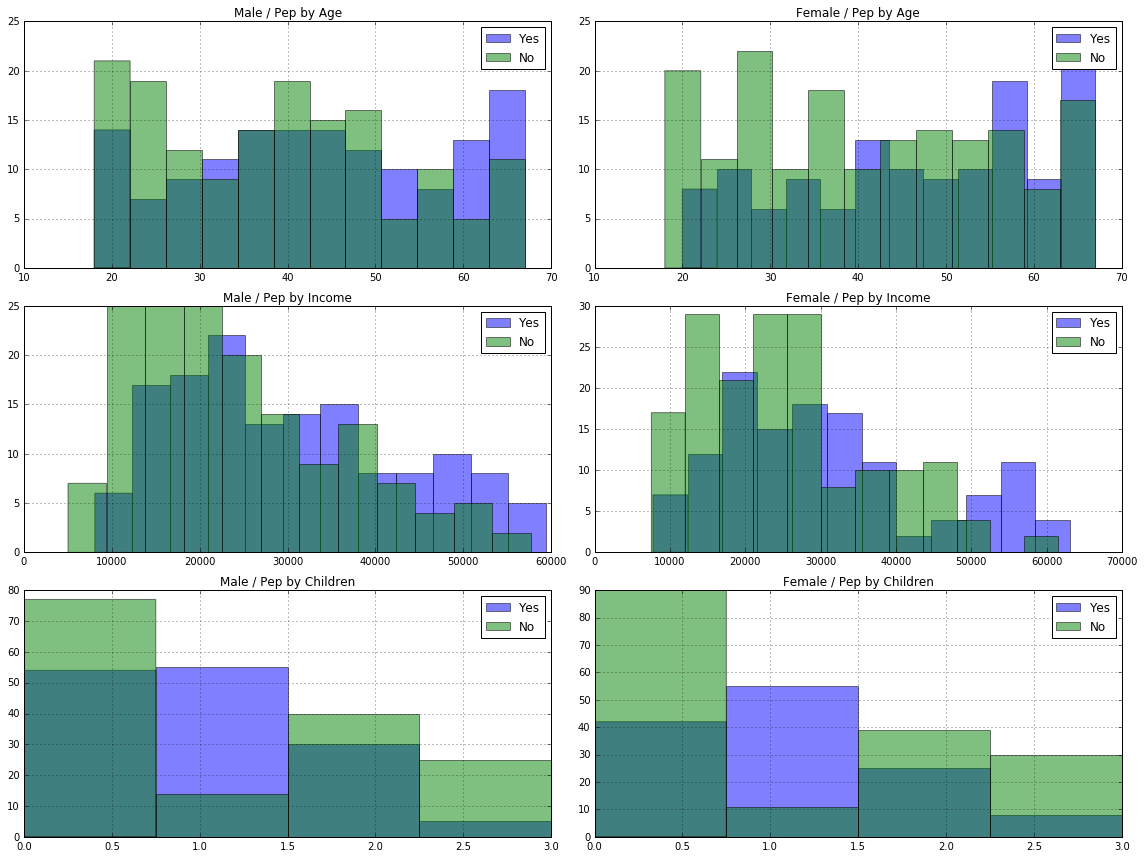

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16,12))

df_bank2[(df_bank2.sex == 0) & (df_bank2.pep == True)]['age'].hist(ax=axes[0,0], bins=12, alpha=0.5, label='Yes')
df_bank2[(df_bank2.sex == 0) & (df_bank2.pep == False)]['age'].hist(ax=axes[0,0], bins=12, alpha=0.5, label='No')
axes[0,0].set_title('Male / Pep by Age')
axes[0,0].legend()

df_bank2[(df_bank2.sex == 1) & (df_bank2.pep == True)]['age'].hist(ax=axes[0,1], bins=12, alpha=0.5, label='Yes')
df_bank2[(df_bank2.sex == 1) & (df_bank2.pep == False)]['age'].hist(ax=axes[0,1], bins=12, alpha=0.5, label='No')
axes[0,1].set_title('Female / Pep by Age')
axes[0,1].legend()

df_bank2[(df_bank2.sex == 0) & (df_bank2.pep == True)]['income'].hist(ax=axes[1,0], bins=12, alpha=0.5, label='Yes')
df_bank2[(df_bank2.sex == 0) & (df_bank2.pep == False)]['income'].hist(ax=axes[1,0], bins=12, alpha=0.5, label='No')
axes[1,0].set_title('Male / Pep by Income')
axes[1,0].legend()

df_bank2[(df_bank2.sex == 1) & (df_bank2.pep == True)]['income'].hist(ax=axes[1,1], bins=12, alpha=0.5, label='Yes')
df_bank2[(df_bank2.sex == 1) & (df_bank2.pep == False)]['income'].hist(ax=axes[1,1], bins=12, alpha=0.5, label='No')
axes[1,1].set_title('Female / Pep by Income')
axes[1,1].legend()

df_bank2[(df_bank2.sex == 0) & (df_bank2.pep == True)]['children'].hist(ax=axes[2,0], bins=4, alpha=0.5, label='Yes')
df_bank2[(df_bank2.sex == 0) & (df_bank2.pep == False)]['children'].hist(ax=axes[2,0], bins=4, alpha=0.5, label='No')
axes[2,0].set_title('Male / Pep by Children')
axes[2,0].legend()

df_bank2[(df_bank2.sex == 1) & (df_bank2.pep == True)]['children'].hist(ax=axes[2,1], bins=4, alpha=0.5, label='Yes')
df_bank2[(df_bank2.sex == 1) & (df_bank2.pep == False)]['children'].hist(ax=axes[2,1], bins=4, alpha=0.5, label='No')
axes[2,1].set_title('Female / Pep by Children')
axes[2,1].legend()

fig.tight_layout()

#### Construindo uma árvore de decisão:

http://scikit-learn.org/stable/modules/tree.html  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier  
http://stackoverflow.com/questions/18753709/how-to-make-sense-the-output-of-decisiontreeclassifier-in-scikit-learn  
http://stackoverflow.com/questions/23557545/how-to-explain-the-decision-tree-from-scikit-learn  
https://github.com/paulgb/sklearn-pandas  

In [17]:
#Install http://www.graphviz.org/ & 
#Instal https://pypi.python.org/pypi/pydotplus

from sklearn import tree
from sklearn.externals.six import StringIO
from IPython.display import Image #needed to render in notebook
import pydotplus

In [18]:
#clf = tree.DecisionTreeClassifier(criterion='entropy', max_features="auto", min_samples_leaf=10)
clf = tree.DecisionTreeClassifier(criterion='gini', max_features="auto", min_samples_leaf=15)
features_list=['age', 'sex', 'region', 'income', 'married', 'children', 'car', 'save_act', 'current_act', 'mortgage']
clf.fit(df_bank2[features_list], df_bank2.pep)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None, min_samples_leaf=15,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [19]:
clf.feature_importances_

array([ 0.04092732,  0.01077543,  0.01478489,  0.32198048,  0.11282731,
        0.40312599,  0.0049608 ,  0.02095155,  0.        ,  0.06966623])

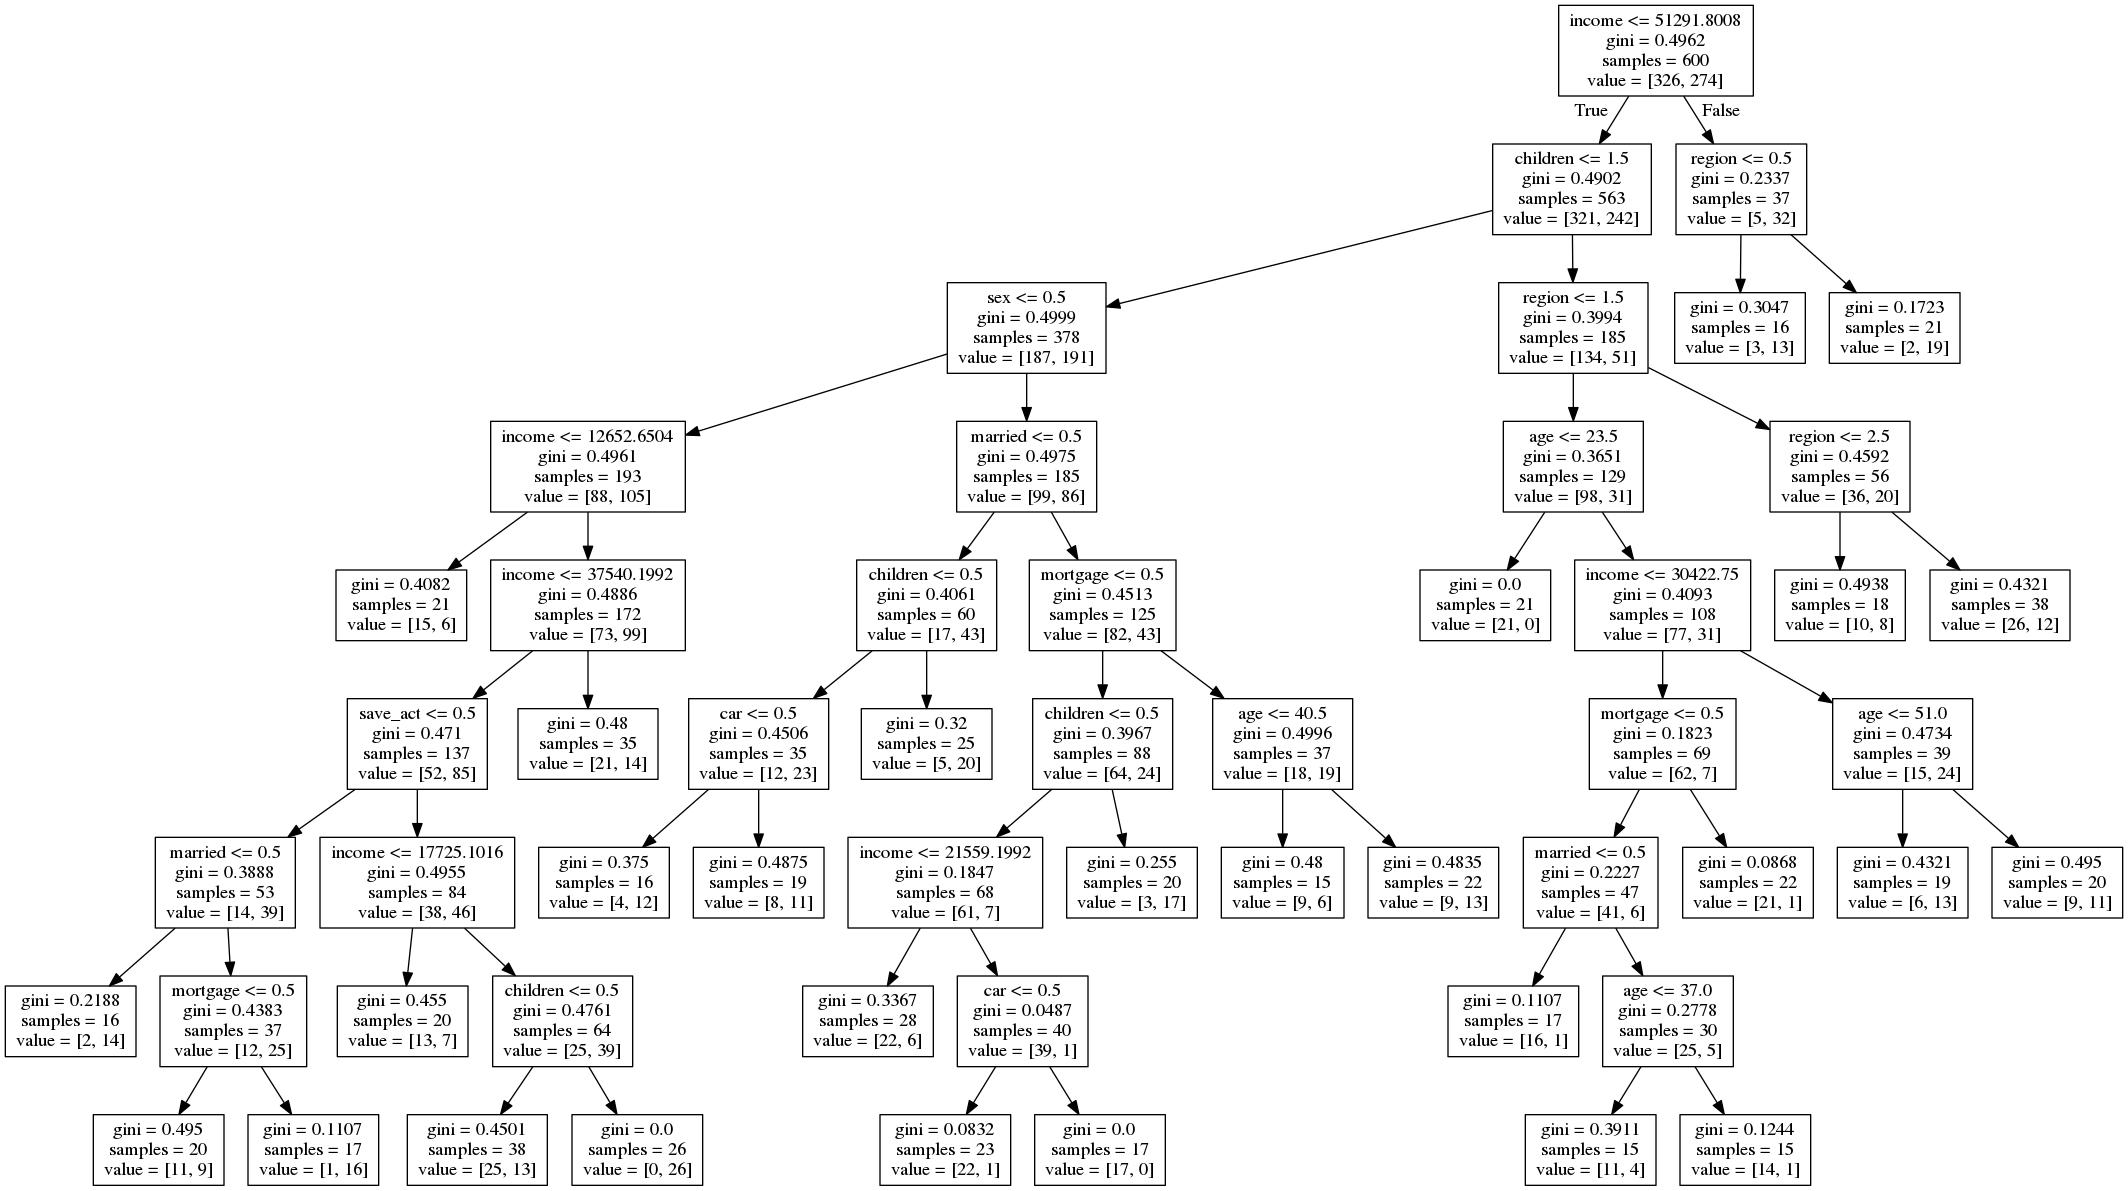

In [20]:
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=features_list) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

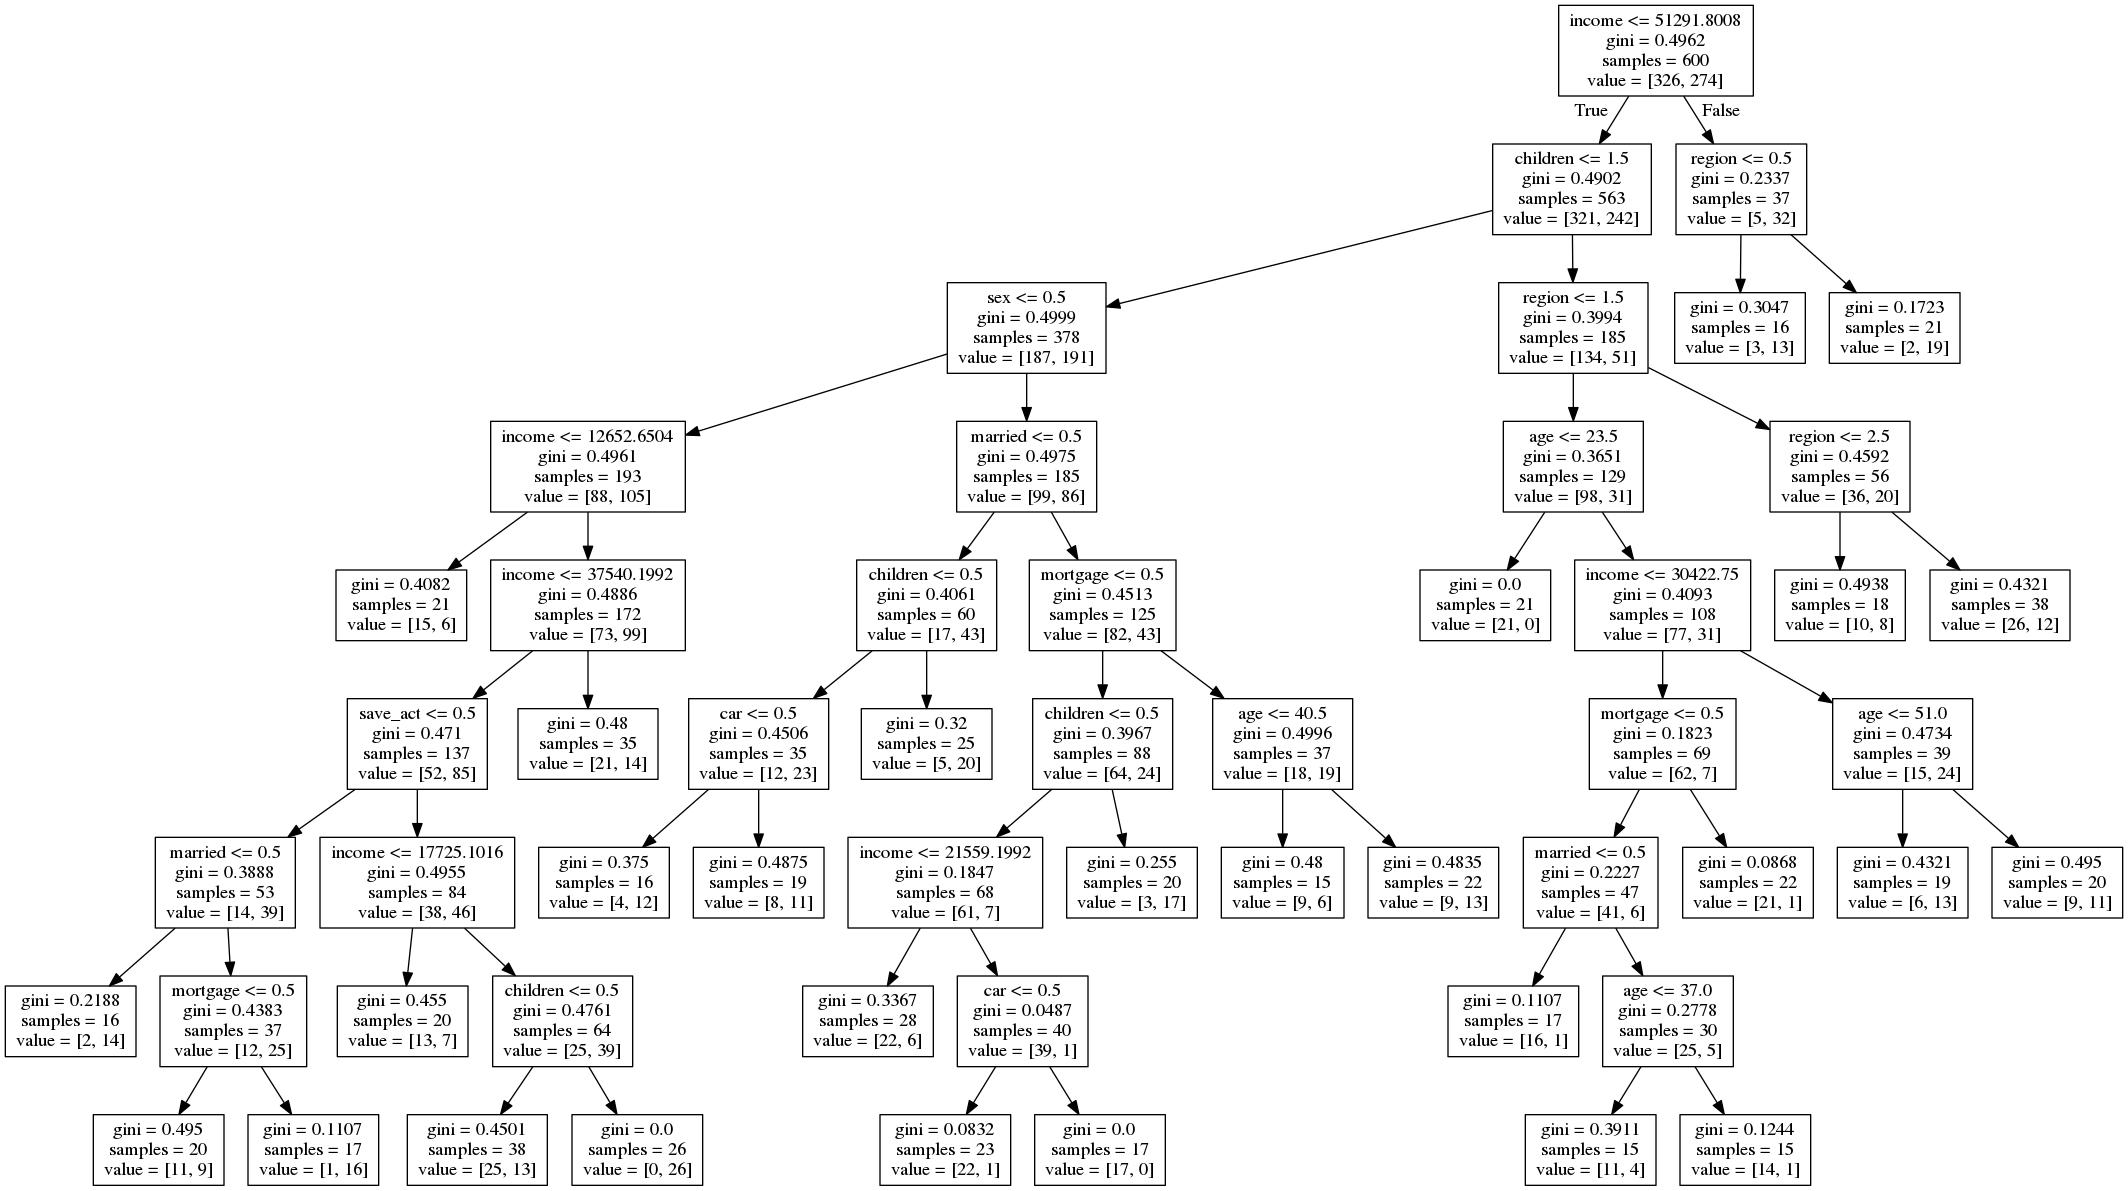

In [21]:
with open("bank_pep.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f, feature_names=features_list)
#Chamando um programa externo ao Ipython com o operador !
!dot -Tpng bank_pep.dot -o bank_pep.png
Image("bank_pep.png")

A partir de nossa árvore treinada, podemos classificar novos elementos:

In [22]:
#df_bank[features_list][0:5]
df_bank[0:5]

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48.0,b'FEMALE',b'INNER_CITY',17546.0,b'NO',b'1',b'NO',b'NO',b'NO',b'NO',b'YES'
1,40.0,b'MALE',b'TOWN',30085.1,b'YES',b'3',b'YES',b'NO',b'YES',b'YES',b'NO'
2,51.0,b'FEMALE',b'INNER_CITY',16575.4,b'YES',b'0',b'YES',b'YES',b'YES',b'NO',b'NO'
3,23.0,b'FEMALE',b'TOWN',20375.4,b'YES',b'3',b'NO',b'NO',b'YES',b'NO',b'NO'
4,57.0,b'FEMALE',b'RURAL',50576.3,b'YES',b'0',b'NO',b'YES',b'NO',b'NO',b'NO'


In [23]:
#clf.predict(df_bank2[features_list].ix[1])
new_data = np.array([40,0,1,17000.0,True,1,True,False,True,True]).reshape(1,-1)
clf.predict(new_data)

array([ True], dtype=bool)

#### Visualizando a superfície de decisão

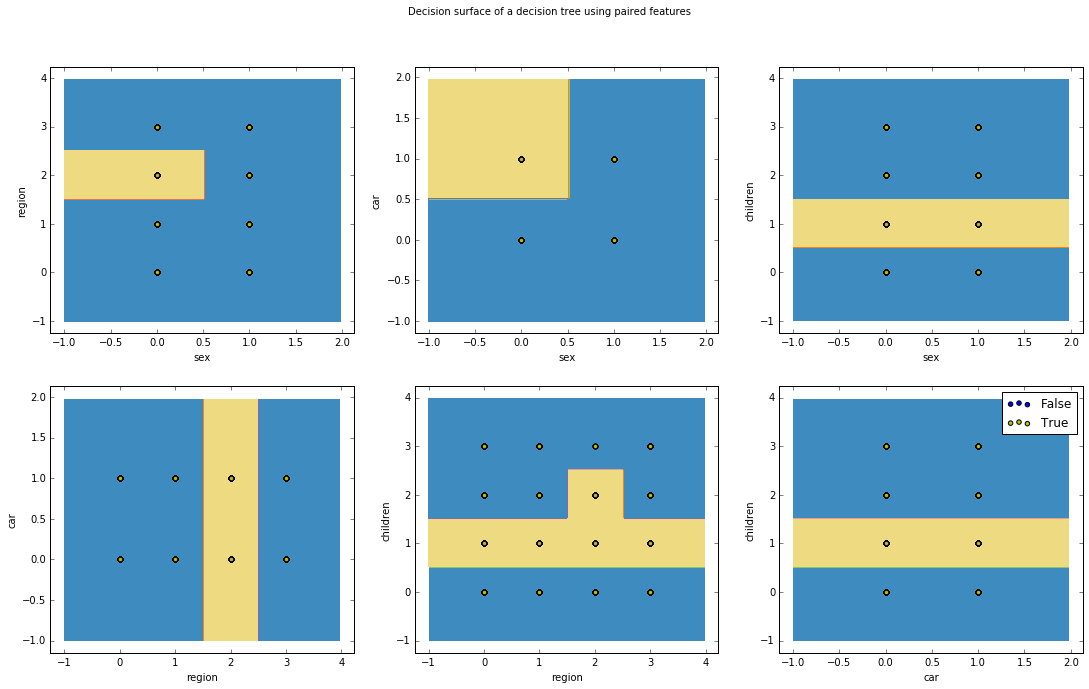

In [24]:
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 2
plot_colors = "by"
plot_step = 0.02
outcome = ['False','True']

for pairidx, pair in enumerate([['sex','region'], ['sex', 'car'], ['sex', 'children'],
                                ['region', 'car'], ['region', 'children'], ['car', 'children']]):
    # We only take the two corresponding features
    X = df_bank2[pair].values
    y = df_bank2.pep

    # Shuffle
    #idx = np.arange(X.shape[0])
    #np.random.seed(13)
    #np.random.shuffle(idx)
    #X = X[idx]
    #y = y[idx]

    # Standardize
    #mean = X.mean(axis=0)
    #std = X.std(axis=0)
    #X = (X - mean) / std

    # Train
    clf2 = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[:, 0], X[:, 1], c=color, label=outcome[i], cmap=plt.cm.Paired)
    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
fig = plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.legend()
plt.show()

#### Aplicando K-Means

Seguindo o exemplo: http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html  

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from mpl_toolkits.mplot3d import Axes3D

In [26]:
centers = [[1, 1], [-1, -1], [1, -1]]

X = df_bank2[['age','income','region']].values

estimators = {'k_means_3': KMeans(n_clusters=3),
              'k_means_8': KMeans(n_clusters=8),
              'k_means_bad_init': KMeans(n_clusters=3, n_init=1, init='random')}

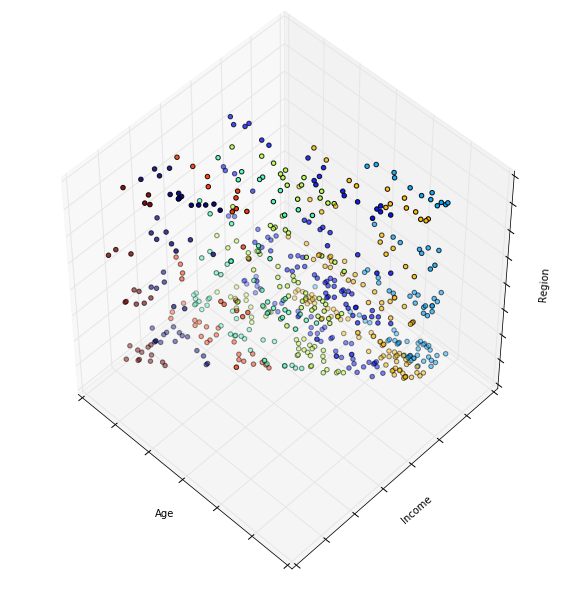

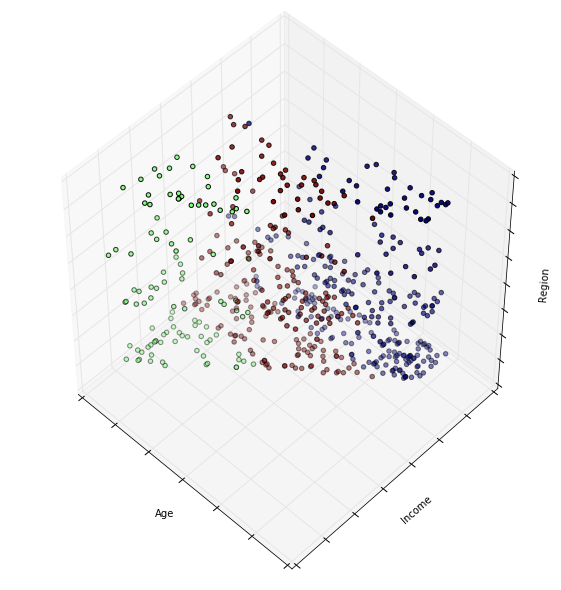

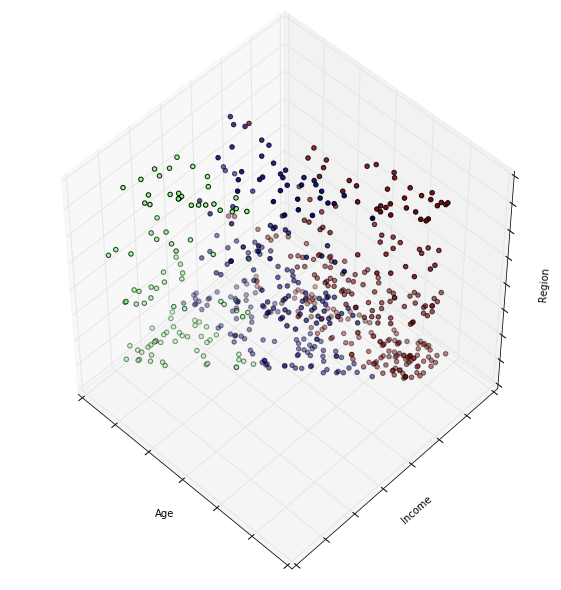

In [27]:
fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(8,8))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels.astype(np.float))
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Age')
    ax.set_ylabel('Income')
    ax.set_zlabel('Region')
    ax.set_label(name)
    fignum = fignum + 1

/home/rsouza/python/3/venv/local/lib/python3.5/site-packages/ipykernel/__main__.py:12: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
/home/rsouza/python/3/venv/local/lib/python3.5/site-packages/ipykernel/__main__.py:13: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
/home/rsouza/python/3/venv/local/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


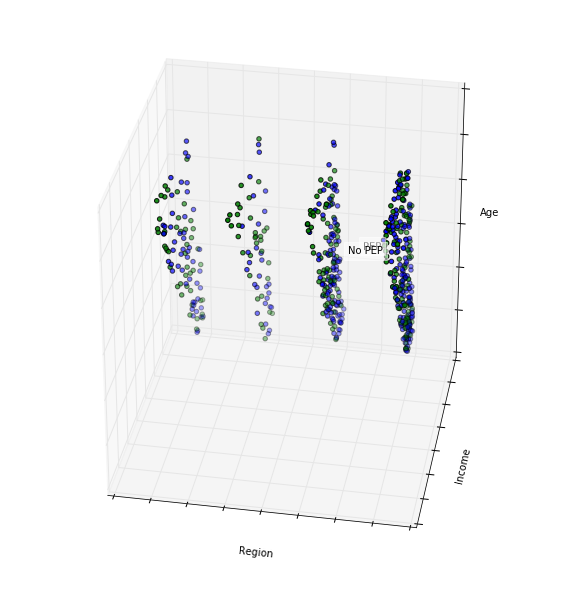

In [28]:
# Plot the ground truth
fig = plt.figure(fignum, figsize=(8, 8))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=100)

plt.cla()

X = df_bank2[['age','income','region']].values
y = df_bank2.pep

for name, label in [('PEP', True),('No PEP', False)]:
    ax.text3D(X[y == label, 2].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 0].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, ['b','g'])
ax.scatter(X[:, 2], X[:, 1], X[:, 0], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Region')
ax.set_ylabel('Income')
ax.set_zlabel('Age')
plt.show()

Desafio:  
Implementar o exemplo: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html  